In [1]:
import pandas

with open("nba_2013.csv", 'r') as csvfile:
    nba = pandas.read_csv(csvfile)

In [2]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
player          481 non-null object
pos             481 non-null object
age             481 non-null int64
bref_team_id    481 non-null object
g               481 non-null int64
gs              481 non-null int64
mp              481 non-null int64
fg              481 non-null int64
fga             481 non-null int64
fg.             479 non-null float64
x3p             481 non-null int64
x3pa            481 non-null int64
x3p.            414 non-null float64
x2p             481 non-null int64
x2pa            481 non-null int64
x2p.            478 non-null float64
efg.            479 non-null float64
ft              481 non-null int64
fta             481 non-null int64
ft.             461 non-null float64
orb             481 non-null int64
drb             481 non-null int64
trb             481 non-null int64
ast             481 non-null int64
stl             481 non-null int64
blk    

In [3]:
y = nba["pts"]
nba.drop(["player","pos","pts","season","bref_team_id"],axis=1,inplace=True)


In [4]:
X=nba
X.head()


,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,season_end
0,23,63,0,847,66,141,0.468,4,15,0.266667,...,0.660,72,144,216,28,23,26,30,122,2013
1,20,81,20,1197,93,185,0.503,0,0,NaN,...,0.581,142,190,332,43,40,57,71,203,2013
2,27,53,12,961,143,275,0.520,0,0,NaN,...,0.639,102,204,306,38,24,36,39,108,2013
3,28,73,73,2552,464,1011,0.459,128,300,0.426667,...,0.815,32,230,262,248,35,3,146,136,2013
4,25,56,30,951,136,249,0.546,0,1,0.000000,...,0.836,94,183,277,40,23,46,63,187,2013


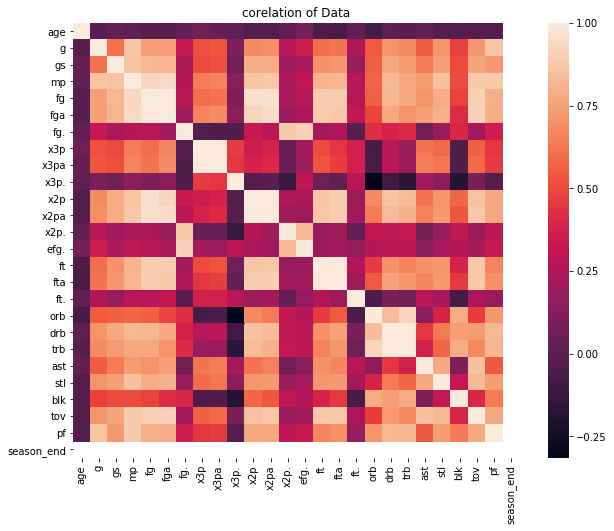

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(nba.corr())
plt.title("corelation of Data")
plt.show()

In [7]:
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values="NaN", strategy='median', axis=0)
X = imp.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 100)
y_train = y_train.ravel()
y_test = y_test.ravel()

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
for K in range(25):
    K_value = K+1
    neigh = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
    neigh.fit(X_train, y_train) 
    y_pred = neigh.predict(X_test)    
y_pred

array([ 383,  490,  181,  159,    6,  181,   76,   76,    0,    6,   76,
         74,   65,    6,  490,  791,  350,  383,  490,  403,   76, 1417,
        859,  890,    0,  298,  890,    0,  202,  181,  666,  339,  211,
        760,  202,  490,  810,   22,   65,  480,  298,  181,  666,  144,
         76,  404,   65,  791,    6,  298,  871, 1417,  791,  403,  480,
       1417,  890,    0,  383,  572,  401,   76,  403,  781,  132,  890,
        810,  810,  781,  404,    7,  810,  404,    7,  144, 1417,  490,
        810,    0,    0,  202,   65,  144,   65,  666,  298,  419,  383,
        132,   76,  810,   79,  871,  171,  871,  202,  202, 1417,  810,
          6,  213,  213,  404, 1053,  132,  490,  810,   74,  878,  181,
        961,    6,  810,  401,  339,    7,  383,  490,    0,  211,  404,
        490,  339,    6, 1042,  171,  448,  781,  490,  890,  810,  144,
        211,  250,   74,   22,  890,  810,  404,  490,  890,    0,  339,
        383,   65], dtype=int64)